# Machine Learning Preprocessing: Train-Test Splitting & Feature Scaling

In this notebook, we explore train-test splitting, and feature scaling.  We almost always split our data into a training set, and a testing set, one to train a model on, and one to test how well it works.  We also may want to scale our features before training the model, but not always.

Sources:
1. <a href='https://www.udemy.com/course/machinelearning/'>Machine Learning A-Z™: Hands-On Python & R In Data Science</a>
2. <a href='https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/empirical-rule-2/'>Empirical Rule ( 68-95-99.7) & Empirical Research</a>

In [1]:
# Import support libraries
import os

# Import analytical libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import machine learning support
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# Load & Preview Data

In this notebook we will preprocess purchase data.  Our dataset contains information on which clients purchased a product based on a set of features.

In [2]:
# Define data file path
purchases_file_path = os.path.join('Data', 'Data.csv')

# Load data
purchases = pd.read_csv(purchases_file_path)

In [3]:
# Preview data
display(purchases.head())

display(purchases.describe())

display(purchases.isna().sum())

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [4]:
# Define features & labels
X = purchases.drop(columns='Purchased').values
y = purchases['Purchased'].values

## Address Missing Values

In [5]:
# Create imputer object
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')

# Fit imputer object to the age & salary features, which are in the columns at index 1 and 2
imputer.fit(X[:, 1:3])

# Apply the imputer transformation based on fitted data
X[:, 1:3] = imputer.transform(X[:, 1:3])

## One-Hot Encoding Categorical Data

In [6]:
# Create ColumnTransformer object
transformer = ColumnTransformer(transformers=[('encoder'
                                    ,OneHotEncoder()
                                    ,[0]) # the Country is in index position 0
                                    ]
                       ,remainder = 'passthrough' # Do nothing to remain columns
                      )

In [7]:
# Fit transformer to data
transformer.fit(X)

# Transform data
X = transformer.transform(X)

## Label Encoding Categorical Data

In [8]:
# Initialize label encoder object
label_encoder = LabelEncoder()

# Fit label encoder to labels
label_encoder.fit(y)

# Transform labels
y = label_encoder.transform(y)

# Train-Test Splitting and Feature Scaling

Our last steps in data preprocessing are train-test splitting, and feature scaling.  Essentially, train-test splitting splits the data into a training set, and a testing set.  We use the training set to train the model, or allow it to find patterns, and then we test the model on the test set, or let it apply those patterns on a set of data it has never seen, to determine how accurate it is.

Feature scaling in a basic sense determines some measure (e.g. standard deviation) to use to transform features onto the same scale.  While the ages in our dataset can range from 30 to 50, our salaries can range from 50,000 to 80,000.  A difference of 20 is huge for age, but nothing for salary.  Machine learning models sensitive to Euclidean distance will be led to believe that age makes no difference in predicting an outcome.  We will visualize this soon.

Feature scaling should be performed after splitting the data into training and testing sets.  You only want data being used to train the model to contribute to this scaling.  The test set is meant to mimic future data that you haven't seen yet; therefore, you don't want this data contributing to the measure you scale on (e.g. mean and standard deviation).  Consider the effect if an extremely impactful outlier were to contribute to these measures, then end up in the test set; this is technically a future data point we haven't seen, yet it drastically increases or decreases our scaling measure.  Following therefrom, you may often want to split before even imputing data.  In this notebook, we imputed first, as to not disrupt the flow of learning.

In [9]:
# Define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [10]:
# View training and testing sets
print(X_train, '\n\n', y_train, '\n\n', X_test, '\n\n', y_test)
# print(X_test)
# print(y_train)
# print(y_test)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]] 

 [0 1 0 0 1 1 0 1] 

 [[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]] 

 [0 1]


## Feature Scaling

As previously mentioned, feature scaling essentially uses some measure (e.g. mean and standard deviation) to bring all features onto a similar scale.  While the ages in our dataset can range from 30 to 50, our salaries can range from 50,000 to 80,000.  A difference of 20 is huge for age, but nothing for salary.  However, 50 is actually a 66.67% change from 30, whereas 80,000 is only a 60% change from 50,000.

Machine learning models sensitive to Euclidean distance will be led to believe that age makes no difference in predicting an outcome.  It is however not always necessary to scale a features; consider a multiple linear regression model for example:

$$
y = x_0 + b_1 x_1 + b_2 x_2 + ... b_n x_n
$$

If any variable is significantly higher than the rest, the coefficients may naturally compensate by taking lower values.  We will revisit this in regression.

The two main feature scaling techniques are <em>normalization</em> and <em>standardization</em> (or $z$-score normalization).  The are achieved by applying one of the following formulas to every point in a dataset:

<center><b>Normalization:</b>
$$
x_{norm} = \frac{x - x_{min}}{x_{max}-x_{min}}
$$
</center>
<br>

<center><b>Standardization:</b>
$$
x_{stand} = z = \frac{x - \mu}{\sigma}
$$
Where $x$ is a particular observation, $\mu$ is the mean of the dataset, and $\sigma$ is the standard deviation of the dataset; the result of this formula is known as the $z$-score.</center>


Conceptually, normalization  puts all features on a scale from 0 to 1.  Assuming that not every single datapoint is the same value, a datapoint $x$ will always be greater than or equal to the minimum $x$ value, thus being zero or a positive number, while the maximum $x$ value minus the minimum $x$ value will always be positive, thus being another positive.  Lastly, there is a bigger difference between the maximum $x$ value and the minimum $x$ value, and between any given $x$ value and the minimum, thus making the denominator larger or the same as the numerator.  Therefore, zero or some positive number dividied by the same or a larger positive number will always lie between 0 and 1.

Standardization (or $z$-score normalization) on the other hand is calcualting the $z$-score of every feature, and roughly puts every datapoint on a range from -3 to 3.  Recall from the Empirical Rule, that 99.7% of data falls within 3 standard deviations of the mean.$^2$  The next question then is when to use which method.  Normalization is typically recommended when you have a normal distribution in most features.  Standardization on the other hand is generally "good all the time."

Before proceeding, it is important to note not to scale encoded values.  Recall that we transformed our country features into binary vectors; we do not want to scale these meaninful numbers.  First, the whole point of scaling is to put all features into the same range.  Standardization puts features onto a scale from -3 to 3, while normalization puts features onto a scale from 0 to 1.  Either way, binary vectors—containing only 0s and 1s—are already within either scale.  Furthermore, the exact values of 0 and 1 have meaning, namely, "yes" and "no."  In our dataset, every row contains a vector with exactly two 0s and exactly one 1.  We would not want to scale these down in every column to values such as [0.3, 0.3, 0.4] which has no meaning with respect to answering "yes" or "no" to what a country is.  Therefore, we do not scale encoded values.

Next, we will create a copy of our features, then scale them, to visually examine what happens when we scale data.  We will also calculate the first Z-score ourselves to show what StandardScaler() does to our data.


In [11]:
# Create copy of training features
X_train_original = X_train.copy(order='C')

In [12]:
X_train_original

array([[0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [13]:
# Get the first age datapoin
age_first_datapoint = X_train_original[:,3][0]

# Get the mean of ages
age_mean = X_train_original[:,3].mean()

# Get the standard deviation of ages
age_standard_deviation = X_train_original[:,3].std()

age_first_datapoint_Z_score = (age_first_datapoint - age_mean) / age_standard_deviation

print(f'First age: {age_first_datapoint}')
print(f'Mean of ages: {age_mean}')
print(f'Standard Deviation of ages: {age_standard_deviation}')
print(f'Z-Score of first age: {age_first_datapoint_Z_score}')

print('\nFigure 1.')

First age: 38.77777777777778
Mean of ages: 40.09722222222222
Standard Deviation of ages: 6.886746418633976
Z-Score of first age: -0.19159184384578545

Figure 1.


Examing the first age, age mean, and age standard deviation in Figure 1, we can calculate the Z-score ourselves.

$$
\displaystyle Z = \frac{38.77 - 40.1}{6.89} = -0.19
$$
<br><center>Figure 2. Z-Score Of First Age</center>


Now let's scale our data and examine the first scaled age.

In [14]:
# View features before scaling
print(X_train, '\n')
print(X_test)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]] 

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [15]:
# Initialize standard scaler
scaler = StandardScaler()

# Fit scaler to numerical features
scaler.fit(X_train[:, 3:])

# Apply scaling transformation to features
X_train[:, 3:] = scaler.transform(X_train[:, 3:])
X_test[:, 3:] = scaler.transform(X_test[:, 3:])

In [16]:
# View features after scaling
print(X_train, '\n')
print(X_test)
print('\nFigure  3. Scaled Features')

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]] 

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]

Figure  3. Scaled Features


As seen in Figure 3, all features are now on the same scale, and are more similar in value.  Furthermore, the scaled age for the first record is -0.19, exactly what we calcualted in Figure 2.  This formula is applied to every datapoint to achive the above.

Now we visualize this.

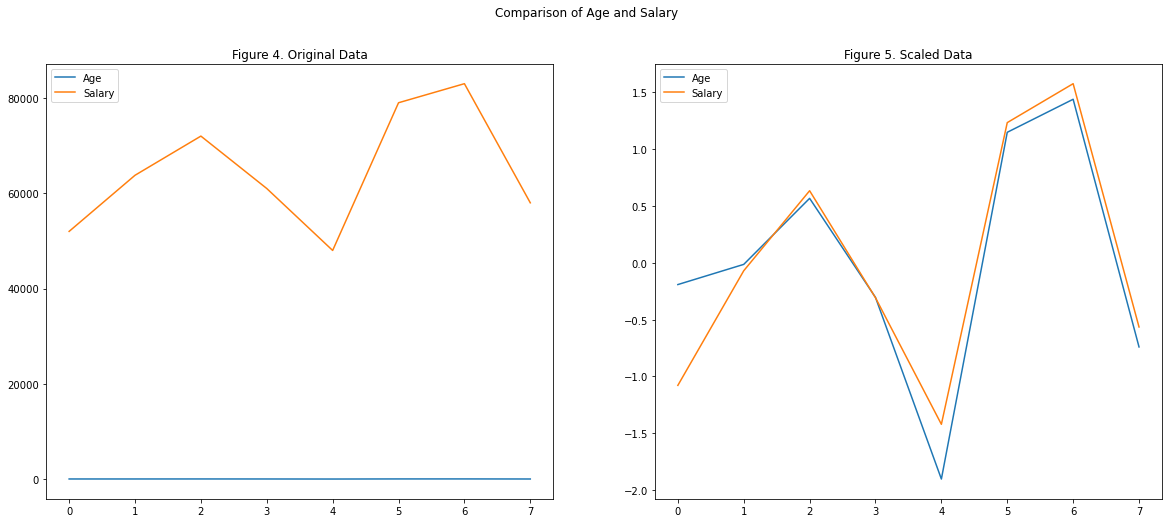

In [17]:
# Create figure for side-by-side comparison
plt.figure(figsize=(20,8))
plt.suptitle('Comparison of Age and Salary')

# Plot original data
plt.subplot(1,2,1)
plt.plot(X_train_original[:,3], label='Age')
plt.plot(X_train_original[:,4], label='Salary')
plt.legend(loc=2)
plt.title('Figure 4. Original Data')

# Plot scaled data
plt.subplot(1,2,2)
plt.plot(X_train[:,3], label='Age')
plt.plot(X_train[:,4], label='Salary')
plt.legend(loc=2)
plt.title('Figure 5. Scaled Data')

# Show plot
plt.show()

As can be seen in Figure 4, it would appear that age hardly changes at all.  Certain machine learning models could be confused into thinking that this feature doesn't matter; even though we showed earlier that ages can have a greater percent change than salaries!  In Figure 5 however, we plot our scaled data, and see that they have roughly the same variation.

Next we will view the features themselves one at a time, to see what happens to the shape of the data.

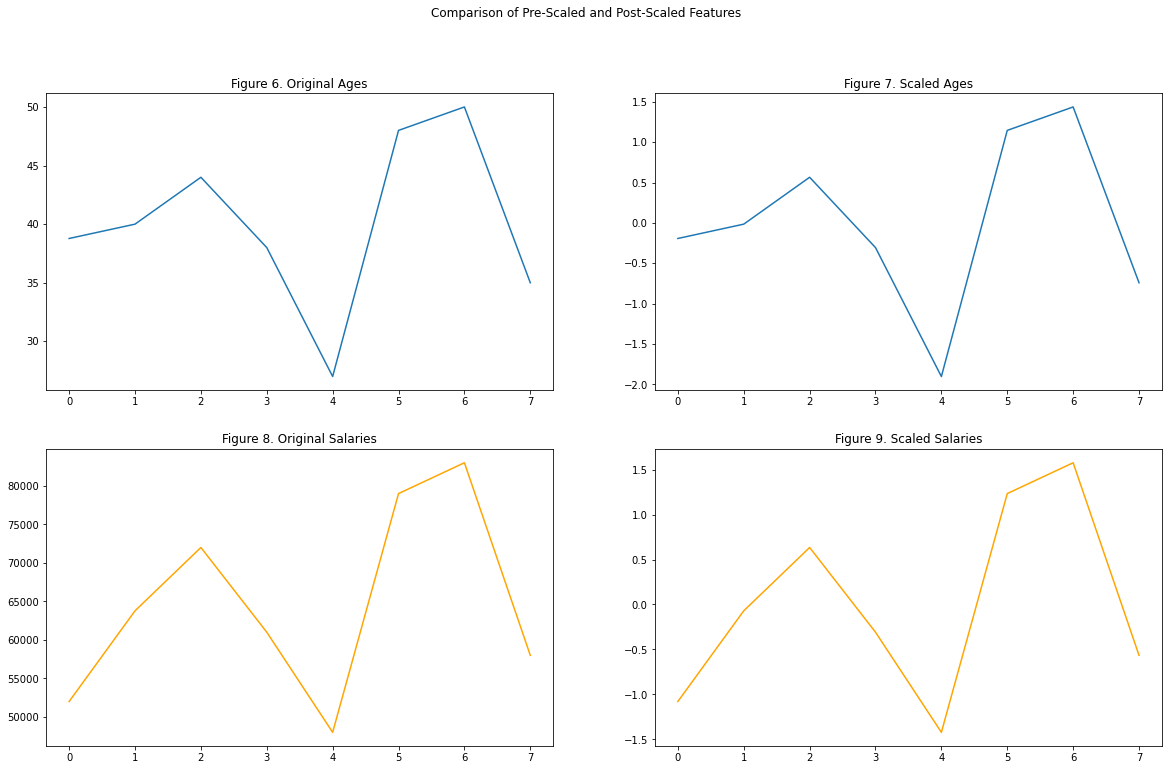

In [18]:
# Create figure for side-by-side comparison
plt.figure(figsize=(20,12))
plt.suptitle('Comparison of Pre-Scaled and Post-Scaled Features')

# Plot pre-scaled ages
plt.subplot(2,2,1)
plt.plot(X_train_original[:,3])
plt.title('Figure 6. Original Ages')

# Plot scaled ages
plt.subplot(2,2,2)
plt.plot(X_train[:,3])
plt.title('Figure 7. Scaled Ages')

# Plot pre-scaled salaries
plt.subplot(2,2,3)
plt.plot(X_train_original[:,4], color='orange')
plt.title('Figure 8. Original Salaries')

# Plot scaled salaries
plt.subplot(2,2,4)
plt.plot(X_train[:,4], color='orange')
plt.title('Figure 9. Scaled Salaries')

# Show plot
plt.show()

As we can see in Figures 6-9, the graphical appearance of the data does not change at all; it is only the scale which has been affected!  The unscaled ages in Figure 6 have a statistical range from about 20 to 50, while the scaled data in Figure 7 has a range from about -1.5 to 1.5.  The unscaled salaries in Figure 8 have a statistical range from approximately 50,000 to 80,000, while the scaled data in Figure 9 has a range from about -1.5 to 1.5.

This is scaling.  The graphical appearance of data does not change.  Before scaling, our features had two scales, one being from 20 to 50, and the other being 50,000 to 80,000; afterwards, they both range from -1.5 to 1.5.

We will end this notebook by viewing two last plots.  This time, we will view a histrogram of unscaled data compared to scaled data.

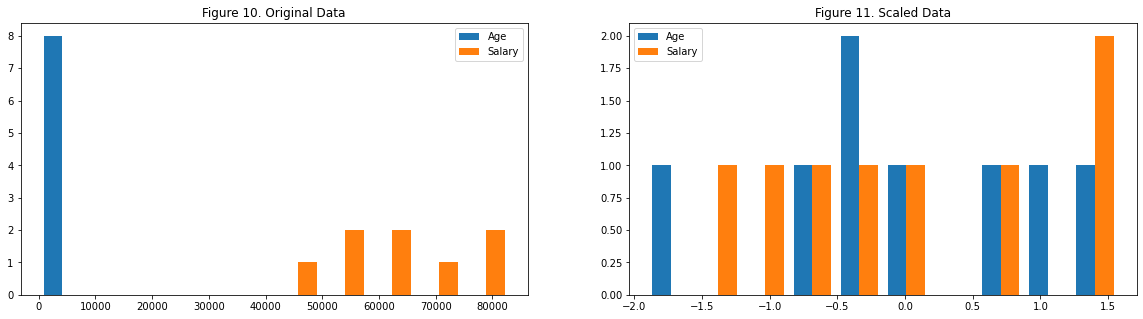

In [19]:
# Create figure for side-by-side comparison
plt.figure(figsize=(20,5))

# Define labels
labels = ['Age', 'Salary']

# Plot original data
plt.subplot(1,2,1)
plt.hist(X_train_original[:,3:])
plt.legend(labels)
plt.title('Figure 10. Original Data')

# Plot scaled data
plt.subplot(1,2,2)
plt.hist(X_train[:,3:])
plt.legend(labels)
plt.title('Figure 11. Scaled Data')

# Show plot
plt.show()

In Figure 10, our unscaled data is heavily skewed right, as salaries are far higher than ages.  While it takes 5 bins to plot each salary, each age fits into only 1 bin, as their range is so small compared to that of salaries.

In Figure 11 however we plot our scaled data and see a normal distribution.  Because the Empirical Rule states that approximately 99.7% of data falls within 3 standard deviations of the mean$^2$, we naturally form a normal distribution as we plot Z-scores.